<a href="https://colab.research.google.com/github/DunngenMaster/ml-project/blob/main/final_file_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [239]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This is a dataset from kaggle(UBER VS LYFT), Lets get some insights from the data and do necessary Cleaning and EDA.

In [240]:
path = "/content/drive/MyDrive/Colab Notebooks/ML project Uber price prediction/rideshare_kaggle.csv"
ride =pd.read_csv(path)

we can see there are no null values max  except price.

In [241]:
ride.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

We can see there are 55095 null values in Price column.

In [242]:
ride =ride.dropna()

In [243]:
ride.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [244]:
#ride=pd.get_dummies(data=ride, columns=['source', 'destination', 'cab_type'])

datetime   ,timezone,id,name,icon ,short_summary,long_summary bare removed,

In [245]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13  dist

In [246]:
ride.drop(
    ['temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust',
       'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime',
       'timezone','id','icon','short_summary','long_summary',
       'product_id', 'latitude','longitude','timestamp',
       'datetime'
       ],
          axis=1,inplace=True)

In [247]:
ride.columns.values


array(['hour', 'day', 'month', 'source', 'destination', 'cab_type',
       'name', 'price', 'distance', 'surge_multiplier'], dtype=object)

In [248]:
pd.options.display.max_columns = None
ride.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0


In [249]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              637976 non-null  int64  
 1   day               637976 non-null  int64  
 2   month             637976 non-null  int64  
 3   source            637976 non-null  object 
 4   destination       637976 non-null  object 
 5   cab_type          637976 non-null  object 
 6   name              637976 non-null  object 
 7   price             637976 non-null  float64
 8   distance          637976 non-null  float64
 9   surge_multiplier  637976 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 53.5+ MB


In [250]:
shortlisted_ride_set =ride.copy()

In [251]:
shortlisted_ride_set.columns.values


array(['hour', 'day', 'month', 'source', 'destination', 'cab_type',
       'name', 'price', 'distance', 'surge_multiplier'], dtype=object)

<ipython-input-252-79a9a3cd8382>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  sc.set_xticklabels( sc.get_xticklabels(),rotation=60)


[Text(0, 0, 'Haymarket Square'),
 Text(1, 0, 'Back Bay'),
 Text(2, 0, 'North End'),
 Text(3, 0, 'North Station'),
 Text(4, 0, 'Beacon Hill'),
 Text(5, 0, 'Boston University'),
 Text(6, 0, 'Fenway'),
 Text(7, 0, 'South Station'),
 Text(8, 0, 'Theatre District'),
 Text(9, 0, 'West End'),
 Text(10, 0, 'Financial District'),
 Text(11, 0, 'Northeastern University')]

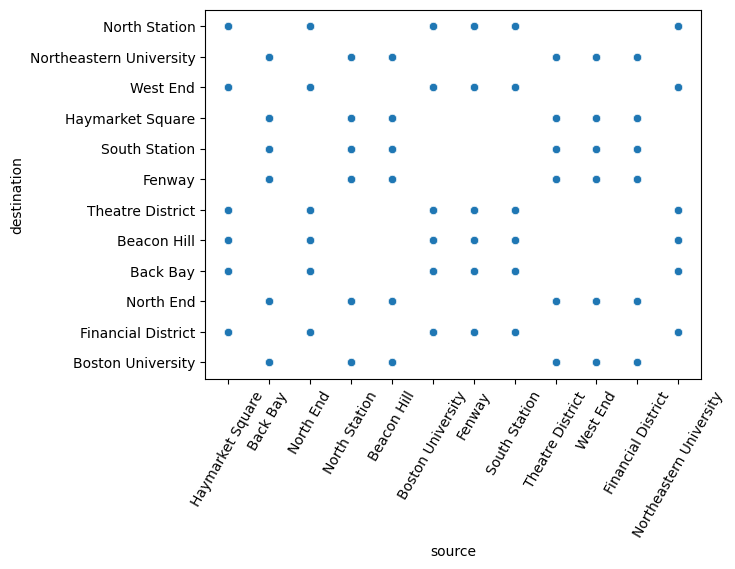

In [252]:
sc=sns.scatterplot(x="source",
                    y="destination",
                    data=shortlisted_ride_set)
sc.set_xticklabels( sc.get_xticklabels(),rotation=60)


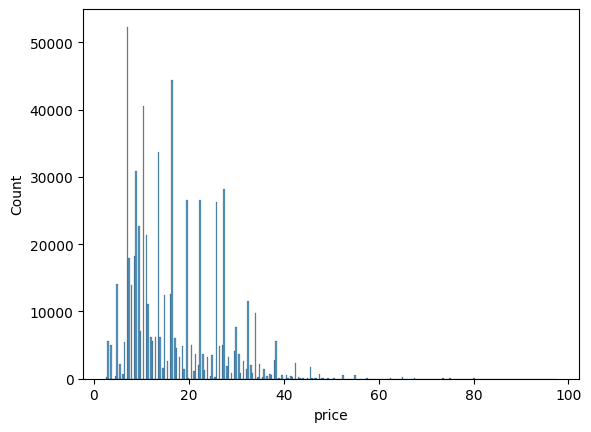

In [253]:
sc=sns.histplot(x="price",data=shortlisted_ride_set)


Remove outliers, need to take transformation for y data look bit right skewed but taking log transformation as well work

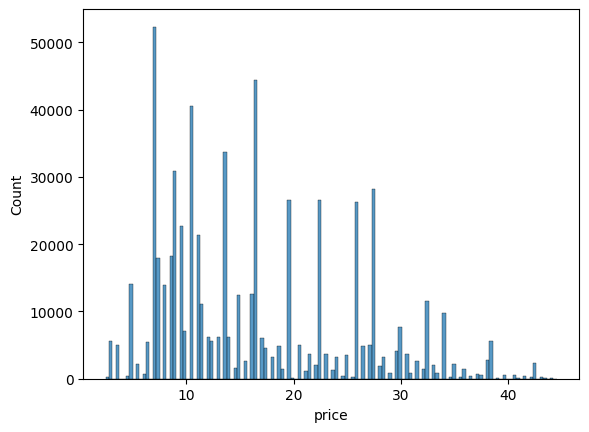

In [254]:
shortlisted_ride_set=shortlisted_ride_set.loc[shortlisted_ride_set['price'] < 45]
sc=sns.histplot(x="price",data=shortlisted_ride_set)

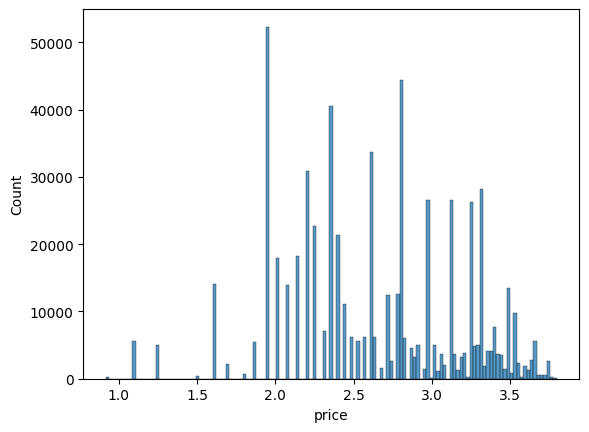

In [255]:
y= np.log(shortlisted_ride_set['price'])
sc=sns.histplot(y)

In [256]:
shortlisted_ride_set.shape

(632862, 10)

<ipython-input-263-7a7c801d8c80>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  sc.set_xticklabels( sc.get_xticklabels(),rotation=60)


[Text(-1.0, 0, '−1'),
 Text(0.0, 0, '0'),
 Text(1.0, 0, '1'),
 Text(2.0, 0, '2'),
 Text(3.0, 0, '3'),
 Text(4.0, 0, '4'),
 Text(5.0, 0, '5'),
 Text(6.0, 0, '6'),
 Text(7.0, 0, '7'),
 Text(8.0, 0, '8'),
 Text(9.0, 0, '9')]

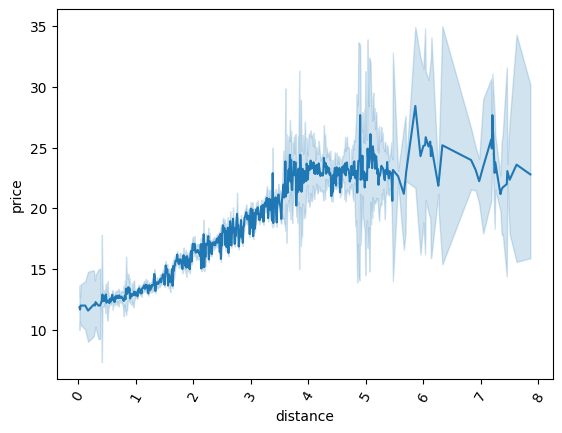

In [263]:
sc=sns.lineplot(x="distance",
                    y="price",
                    data=shortlisted_ride_set)
sc.set_xticklabels( sc.get_xticklabels(),rotation=60)

<ipython-input-264-23401083afa5>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  sc.set_xticklabels( sc.get_xticklabels(),rotation=60)


[Text(-1.0, 0, '−1'),
 Text(0.0, 0, '0'),
 Text(1.0, 0, '1'),
 Text(2.0, 0, '2'),
 Text(3.0, 0, '3'),
 Text(4.0, 0, '4'),
 Text(5.0, 0, '5'),
 Text(6.0, 0, '6'),
 Text(7.0, 0, '7'),
 Text(8.0, 0, '8'),
 Text(9.0, 0, '9')]

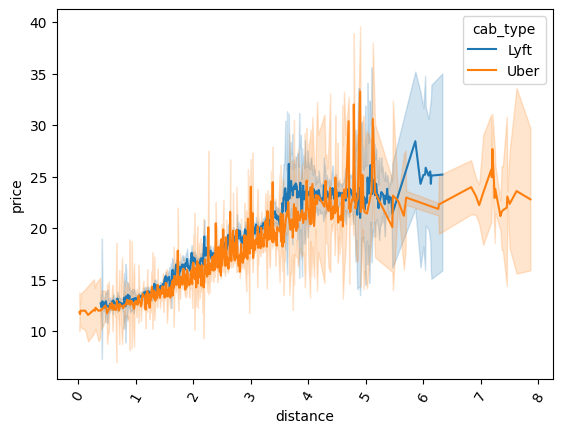

In [264]:
sc=sns.lineplot(x="distance",
                    y="price",
                    data=shortlisted_ride_set, hue="cab_type")
sc.set_xticklabels( sc.get_xticklabels(),rotation=60)

<ipython-input-266-2cf4ef6f1dfd>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  sc.set_xticklabels( sc.get_xticklabels(),rotation=60)


[Text(0, 0, '0.02'),
 Text(1, 0, '0.03'),
 Text(2, 0, '0.04'),
 Text(3, 0, '0.12'),
 Text(4, 0, '0.17'),
 Text(5, 0, '0.27'),
 Text(6, 0, '0.29'),
 Text(7, 0, '0.3'),
 Text(8, 0, '0.35'),
 Text(9, 0, '0.38'),
 Text(10, 0, '0.39'),
 Text(11, 0, '0.4'),
 Text(12, 0, '0.41'),
 Text(13, 0, '0.42'),
 Text(14, 0, '0.43'),
 Text(15, 0, '0.44'),
 Text(16, 0, '0.45'),
 Text(17, 0, '0.46'),
 Text(18, 0, '0.47'),
 Text(19, 0, '0.48'),
 Text(20, 0, '0.49'),
 Text(21, 0, '0.5'),
 Text(22, 0, '0.51'),
 Text(23, 0, '0.52'),
 Text(24, 0, '0.53'),
 Text(25, 0, '0.54'),
 Text(26, 0, '0.55'),
 Text(27, 0, '0.56'),
 Text(28, 0, '0.57'),
 Text(29, 0, '0.58'),
 Text(30, 0, '0.59'),
 Text(31, 0, '0.6'),
 Text(32, 0, '0.61'),
 Text(33, 0, '0.62'),
 Text(34, 0, '0.63'),
 Text(35, 0, '0.64'),
 Text(36, 0, '0.65'),
 Text(37, 0, '0.66'),
 Text(38, 0, '0.67'),
 Text(39, 0, '0.68'),
 Text(40, 0, '0.69'),
 Text(41, 0, '0.7'),
 Text(42, 0, '0.71'),
 Text(43, 0, '0.72'),
 Text(44, 0, '0.73'),
 Text(45, 0, '0.74'),
 Te

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


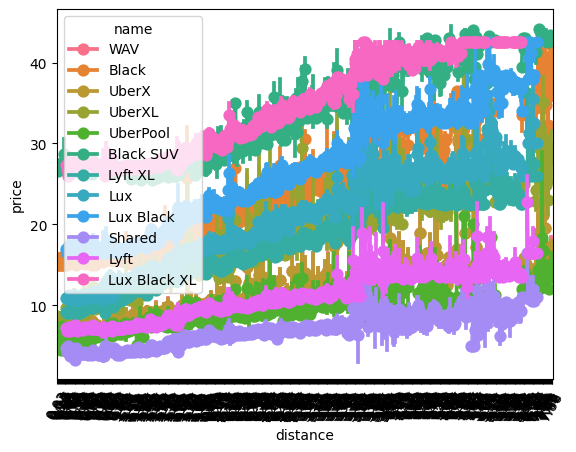

In [266]:
sc=sns.lineplot(x="distance",
                    y="price",
                    data=shortlisted_ride_set, hue="name")
sc.set_xticklabels( sc.get_xticklabels(),rotation=60)

In [260]:
uber= shortlisted_ride_set.loc[shortlisted_ride_set['cab_type']=='Uber']
Lyft= shortlisted_ride_set.loc[shortlisted_ride_set['cab_type']=='Lyft']

In [261]:
uber['name'].value_counts()

name
WAV          55096
UberX        55094
UberPool     55091
UberXL       55058
Black        55047
Black SUV    54160
Name: count, dtype: int64

In [262]:
a4_dims = (15.7, 5.27)
fig, axs = plt.subplots(ncols=6,figsize=a4_dims)
sns.scatterplot(x="distance",
                    y="price",
                    data=(uber[uber['name']=='WAV']), hue="price",ax=axs[0])

sns.scatterplot(x="distance",
                    y="price",
                    data=(uber[uber['name']=='UberX']), hue="price",ax=axs[1])

sns.scatterplot(x="distance",
                    y="price",
                    data=(uber[uber['name']=='UberPool']), hue="price",ax=axs[2])

sns.scatterplot(x="distance",
                    y="price",
                    data=(uber[uber['name']=='UberXL']), hue="price",ax=axs[3])

sns.scatterplot(x="distance",
                    y="price",
                    data=(uber[uber['name']=='Black']), hue="price",ax=axs[4])

sns.scatterplot(x="distance",
                    y="price",
                    data=(uber[uber['name']=='Black SUV']), hue="price",ax=axs[5])5

SyntaxError: invalid syntax (<ipython-input-262-134d7e8a82cb>, line 25)

In [ ]:
Lyft['name'].value_counts()

In [ ]:
sc=sns.scatterplot(x="distance",
                    y="price",
                    data=shortlisted_ride_set, hue="name")
sc.set_xticklabels( sc.get_xticklabels(),rotation=60)

In [ ]:
a4_dims = (15.7, 5.27)

fig, axs = plt.subplots(ncols=3,figsize=a4_dims)
sns.histplot(x="month",data=shortlisted_ride_set,ax=axs[0])
sns.histplot(x="hour",data=shortlisted_ride_set,ax=axs[1])
sns.histplot(x="day",data=shortlisted_ride_set,ax=axs[2])


In [ ]:
shortlisted_ride_set['month'].unique()

In [ ]:
shortlisted_ride_set['surge_multiplier'].unique()

In [ ]:
shortlisted_ride_set['uvIndex'].unique()

In [ ]:
filtered_rides =shortlisted_ride_set.copy()

In [ ]:
pd.options.display.max_columns = None
shortlisted_ride_set.head()

In [ ]:
y=ride.iloc[:,4]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.2,random_state=0)

In [ ]:
len(x_train),len(x_test)

In [ ]:
len(x_s.columns)

In [ ]:
import statsmodels.api as sm





In [ ]:
#x_s=np.append(np.ones((693071,1)).astype(int),axis=1,values=x)

In [ ]:
#reg_ols=sm.OLS(endog=y,exog=x_s).fit()
#reg_ols.summary()



In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)

print("lasso model coefficients:{}".format(lasso_model.coef_))

In [ ]:
for i in range(len(x_train.columns)):
    print("lasso model of {} coefficients:{}".format(x_train.columns[i],lasso_model.coef_[i]))

remove all variables whose coefficients =0 , so remaining are 13 variables

building model with remaining var8iables

In [ ]:
x_idv=ride[['timestamp','distance','windGustTime','temperatureHighTime','temperatureLowTime','apparentTemperatureHighTime','apparentTemperatureLowTime','sunriseTime','uvIndexTime','temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime','apparentTemperatureMaxTime']]
#y_dv=y

In [ ]:
y_dv=ride['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x_idv,y_dv,test_size=0.20,random_state=0)

In [ ]:
len(x_train1),len(x_test1)


In [ ]:
MLR_Model1=LinearRegression()
MLR_Model1.fit(x_train1,y_train1)

In [ ]:
y_pred=MLR_Model1.predict(x_test1)

In [ ]:
bias=MLR_Model1.score(x_train1,y_train1)
variance=MLR_Model1.score(x_test1,y_test1)

In [ ]:
bias,variance

In [ ]:
Ridge_Model=Ridge(alpha=0.05)

In [ ]:
Ridge_Model.fit(x_train1,y_train1)
y_pred1=Ridge_Model.predict(x_test1)

In [ ]:
bias=Ridge_Model.score(x_train1,y_train1)
variance=Ridge_Model.score(x_test1,y_test1)

In [ ]:
bias,variance

In [ ]:
data_train_test=pd.concat([x_train1,y_train1],axis=1)
data_train_test.head()
#y_train1.columns=['number','price']
#y_train1=pd.DataFrame(y_train1)
y_train1.head()

In [ ]:
import statsmodels.formula.api as smf

ols1 = smf.ols(formula='price ~timestamp+distance+windGustTime+temperatureHighTime+temperatureLowTime+apparentTemperatureHighTime+apparentTemperatureLowTime+sunriseTime+uvIndexTime+temperatureMinTime+temperatureMaxTime+apparentTemperatureMinTime+apparentTemperatureMaxTime', data=data_train_test).fit()
print(ols1.summary())